# 모두의 인공지능 with 파이썬
모두의 인공지능 with 파이썬 책의 예제 코드 입니다
<br>
https://thebook.io/080244/
<br>
image.png


# 숫자 인식 인공지능 만들기


## 개발 환경 만들기

In [ ]:
from tensorflow.keras.models import Sequential #시퀀셜 모델을 불러오는 명령어
from tensorflow.keras.layers import Dense, Activation #dense(전결합층) Activation(활성화 함수)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist #mnist 데이터셋 가져오기
import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 불러오기

In [ ]:
#  데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


## mnist 데이터셋에서 X의 형태 바꾸기

In [ ]:
# mnist 데이터셋에서 X의 형태 바꾸기
X_train = x_train.reshape(60000, 784) #28x28짜리 칸을 1x784짜리 칸으로 형태 변경
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32') #자료형 변경
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


## mnist 데이터셋에서 Y의 형태 바꾸기

In [ ]:
#mnist 데이터셋에서 Y의 형태 바꾸기
Y_train = to_categorical(y_train, 10) #Y_train 데이터를 원-핫 인코딩합니다
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


## 모델 설계

In [ ]:
#모델 설계

model = Sequential()
model.add(Dense(512, input_shape=(784,)))  #입력하는 데이터의 형태(input_shape)는 (784, )이며, 첫 번째 은닉층의 노드는 512개로 구성
model.add(Activation('relu')) #렐루 함수 전달
model.add(Dense(256)) #두 번째 은닉층은 256개의 노드로 구성
model.add(Activation('relu'))
model.add(Dense(10)) #마지막 층은 10개의 노드로 구성
model.add(Activation('softmax')) #각 노드에서 전달되는 값의 총 합이 1이 되도록 소프트맥스 함수를 사용
model.summary() #summary 함수는 모델이 어떻게 구성되었는지 살펴보는 함수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 

## 모델 학습

In [ ]:
#모델 학습
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 20s 37ms/step - loss: 0.2274 - accuracy: 0.9333
Epoch 2/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0846 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0524 - accuracy: 0.9833
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0380 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0138 - acc

## 모델 정확도 살펴보기

In [ ]:
#모델 정확도 살펴보기

score = model.evaluate(X_test, Y_test)#evaluate 함수는 모델의 정확도를 평가할 수 있는 기능 2가지 데이터를 넣어야 함  첫 번째 데이터는 테스트할 데이터  두 번째 데이터는 테스트할 데이터의 정답
print('Test score:', score[0]) #오차값을 출력
print('Test accuracy:', score[1]) # 정확도를 출력

313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9764
Test score: 0.09343546628952026
Test accuracy: 0.9764000177383423


## 모델 학습결과 확인

In [ ]:
#모델 학습결과 확인
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 2s 5ms/step


## 잘 예측한 데이터 살펴보기

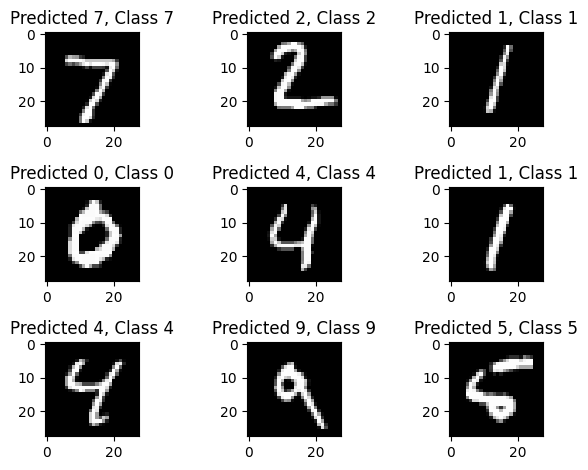

In [ ]:
#잘 예측한 데이터 살펴보기
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

## 잘 예측하지 못한 데이터 살펴보기

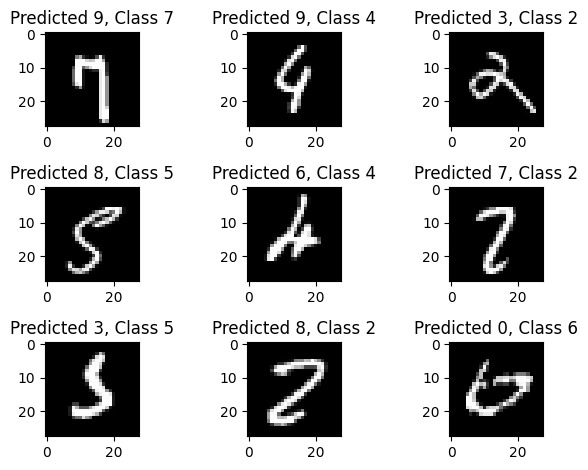

In [ ]:
 #잘 예측하지 못한 데이터 살펴보기
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()

# 전염병 예측 인공지능 만들기

## 개발 환경 만들기

In [1]:
#개발 환경 만들기
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

## 데이터 가져오기

In [2]:
# 데이터 가져오기
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[1], engine='python', skipfooter=3) #secols=[3]는 사용할 데이터를 의미 사용할 데이터가 4번째 열에 있는 확진자 수이므로 3(파이썬은 0부터 시작하죠?)을 넣어줍니다. 마지막 engine='python'은 사용할 언어를 의미
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')#지금 읽어온 데이터는 정수형 데이터이므로 정수형 데이터를 소수점 단위까지 나누기 위해서는 실수로 바꿔 줄 필요가 있다

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.
     Inspected
0         1352
1         2097
2         2598
3         3110
4         4325
..         ...
107     820289
108     826437
109     839475
110     852876
111     868666

[112 rows x 1 columns]


##데이터 정규화 및 분류하기

In [3]:
#데이터 정규화 및 분류하기
scaler = MinMaxScaler(feature_range=(0, 1))
#정규화 scaler 방식 사용 데이터를 정규화하는 범위를 0~1 사이의 값(feature_range=(0, 1))으로 결정
Dataset = scaler.fit_transform(dataset)
 #fit_transform 함수를 사용하여 데이터를 정규화 정규화한 데이터를 Dataset으로 정함
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
#train_test_split 함수를 사용하여 전체 데이터를 훈련 데이터와 검증 데이터로 분류
#분류할 데이터(Dataset), 검증 데이터 비율(test_size=0.2), 추출하는 방법(shuffle=False)
print(len(train_data), len(test_data))


89 23


##데이터 형태 바꾸기

In [ ]:
#데이터 형태 바꾸기
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    #배열([])을 사용하여 각각 x_data와 y_data를 넣을 수 있는 공간을 만듬
    for i in range(len(dataset)-look_back-1):
        data = dataset[i:(i+look_back), 0]
        x_data.append(data)
        y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

## 입력 데이터 생성하기


In [ ]:
# 입력 데이터 생성하기
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
#create_dataset 함수를 호출
#첫 번째 인자에 훈련 데이터(train_data)를 두 번째 인자에 look_back
x_test, y_test = create_dataset(test_data, look_back)
#첫 번째 인자에 검증 데이터(test_data)를 넣습니다. 그리고 두 번째 인자에 look_back
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


## 인공지능 모델에 넣어줄 형태로 변환하기

In [ ]:
#인공지능 모델에 넣어줄 형태로 변환하기
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
#형태를 바꿔 주는 함수(reshape) 함수의 첫 번째에는 바꿀 데이터, 두 번째에는 어떤 형태로 바꿀지
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


## 인공지능 모델 만들기

In [ ]:
#인공지능 모델 만들기
model = Sequential()
#model이라는 인공지능 모델을 만들겠습니다. 이 모델은 시퀀셜(Sequential) 모델입니다.
model.add(SimpleRNN(3, input_shape=(1, look_back)))
#RNN 기법 중 SimpleRNN을 사용
model.add(Dense(1, activation="linear"))
#최종 예측 값(즉 여기선 확진자수 노드는 1개)
model.compile(loss='mse', optimizer='adam')
#인공지능을 계산하는 방법을 결정
# 손실 함수는 mse(평균 제곱 오차, mean_squared_error)로, 옵티마이저는 adam 옵티마이저를 사용
#다양한 손실 함수 중 왜 하필이면 평균 제곱 오차를 사용할까요? 바로 실제 확진자의 수와 예측한 값의 차이를 바탕으로 오차를 나타낼 수 있기 때문입니다.
model.summary()
#생성된 모델을 요약
# Model: "sequential_1"는 첫 번째 순서로 만든 순차 모델이라는 의미입니다. (실습 환경에 따라 숫자는 달라질 수 있습니다.)
#simple_rnn (Simple RNN)은 SimpleRNN을 사용하였다는 의미입니다
#Output Shape에서 볼 수 있듯이 총 노드의 수는 3개입니다.
#Param은 simple_rnn의 파라미터(가중치와 편향 값)의 수를 의미합니다.
#dense (Dense)는 출력층에서의 형태 및 파라미터 수를 의미합니다.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 학습시키기

In [ ]:
#모델 학습시키기
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)
#입력 데이터(x_train) 출력 데이터(y_train), 반복 횟수(epochs=100), 한 번에 학습시킬 데이터의 양(batch_size=1)을 설정

Epoch 1/100
85/85 [==============================] - 1s 2ms/step - loss: 0.6281
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0922
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0705
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0378
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 13/100
85/85 [=================

## 데이터 예측하기

In [ ]:
# 데이터 예측하기
trainPredict = model.predict(X_train)
#생성한 인공지능 모델에 데이터를 넣어서 결괏값을 생성하는 predict 함수
#훈련 데이터(X_train)의 값을 모델에 넣어 값을 예측
#그 예측 값을 trainPredict에 넣음
testPredict = model.predict(X_test)
#검증 데이터(X_test)의 값을 모델에 넣어 값을 예측
#예측 값을 trainPredict에 넣음
TrainPredict = scaler.inverse_transform(trainPredict)
#생성한 인공지능 모델에 훈련 데이터를 넣어서 얻은 결과가 = trainPredic
#trainPredict 에 저장된 값은 0~1사이임 (정규화 과정으로 인해서)
#이를 자연수의 형태로 바꾸기 위해서는 훈련 데이터의 예측 값(trainPredict)을 scaler 라이브러리의 inverse_transform 함수를 사용
#이 함수를 사용하면 0과 1 사이의 값을 정규화하기 전의 확진자의 수로 바꿀 수 있음
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 21ms/step


## 모델의 정확도 살펴보기

In [ ]:
#모델의 정확도 살펴보기
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
# mean_squared_error 함수를 사용
# 첫 번째에는 실제 정답값 전체를 가져오기 위해 Y_train[0]을
#두 번째에는 예측 값 전체를 가져오기 위해 TrainPredict[:,0]을 넣음
#예측 값의 형태가 [:,0]인 이유는 배열이 2차원 배열로 이루어져 있기 때문
#평균 제곱근 오차를 구하기 위해 결괏값을 제곱근한 값을 math.sqrt 함수를 사용
print('Train Score: %.2f RMSE' % (trainScore))
#실수값을 출력할 때에는 %f를 사용
#소수 둘째 자리까지만 출력하라는 의미로 %.2f를 입력
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
#평균 제곱 오차를 구할 때 훈련 데이터의 값((Y_test)과 그 예측 값(TestPredict)을 넣어줌
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6651.80 RMSE
Test Score: 44374.64 RMSE


## 결과를 그래프로 확인하기

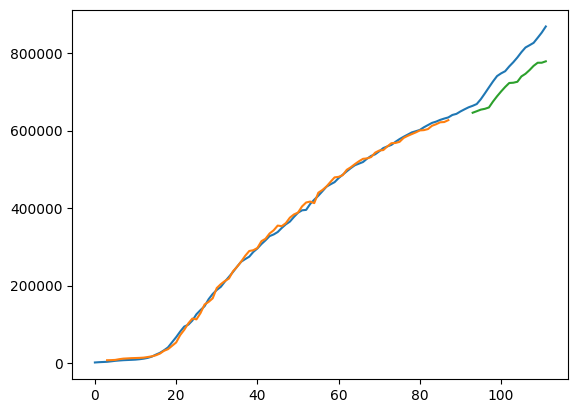

In [ ]:
#결과를 그래프로 확인하기
trainPredictPlot = np.empty_like(dataset)
#전체 데이터(dataset)와 동일한(np.empty_like) 형태의 넘파이 배열(trainPredictPlot)을 만들어 줌
trainPredictPlot[:, :] = np.nan
#만들어진 배열의 모든 값을 nan으로 설정
#콜론(:)은 모든값을 의미함. (처음):(마지막)에서 처음과 마지막은 생략하고 나타내는 것
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
#처음 3일치는 건너뛰고 4일차(look_back)부터 TrainPredict 배열의 원소 수까지(len(TrainPredict)+look_back)를 범위로 지정
testPredictPlot = np.empty_like(dataset)
#전체 데이터(dataset)와 동일한(np.empty_like) 넘파이 배열(trainPredictPlot)을 만들어 줌
testPredictPlot[:, :] = np.nan
#만들어진 배열의 모든 값을 nan으로 설정
testPredictPlot[len(TrainPredict)+((look_back+1)*2):len(dataset), :] = TestPredict
#검증 데이터를 예측한 결괏값을 그래프로 나타내기 위한 코드
#검증 데이터의 예측 값을 넣는 시작점은 훈련 데이터를 예측한 값 이후(len(TrainPredict)+look_back+1)에 3일치의 예측 값을 건너뛴(look_back+1) 자리임
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show( )

# 숫자 생성 인공지능 만들기

## 개발 환경 만들기

In [ ]:
# 개발 환경 만들기
from keras.models import Model, Sequential
from keras.layers import Dense, Input
#레이어 도구(layers) 중 Dense와 Input 함수를 불러오는 명령어
from keras.layers import LeakyReLU
# from keras.layers.advanced_activations import LeakyReLU 이거 왜 안됨?
from keras.optimizers import Adam
# 옵티마이저 (optimizers) 중 아담(Adam) 옵티마이저를 불러옴
from keras.datasets import mnist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = (x_test.astype(np.float32) - 127.5)/127.5
#그 데이터의 세부 값을 –1~1 사이의 값으로 나타내기 위해, 먼저 나눌 수 있는 실수 값으로 데이터를 변경합니다(x_test.astype(np.float32)).
#다음으로 데이터를 –1~1 사이의 값으로 변경합니다.
#mnist 데이터셋의 그림은 0~255까지의 숫자로 이루어져 있는데,
#그 중간 값인 127.5를 뺀 후 다시 127.5로 나누면((x_test.astype(np.float32) - 127.5)/127.5) 0은 -1로, 255는 1로 값이 바뀌며,
#그 중간 값 또한 비율에 따라 축소됩니다.
mnist_data = x_test.reshape(10000, 784)
#8×28 형태를 784×1 형태로 변환
print(mnist_data.shape)
len(mnist_data)

(10000, 784)


10000

## 생성자 신경망 만들기

In [ ]:
# 생성자 신경망 만들기
def create_generator():
    generator = Sequential()
    #시퀀셜 모델을 사용
    generator.add(Dense(units=256,input_dim=100))
    #모델에 입력하는 값은 100임(input_dim=100)
    #이 신경망의 첫 번째 층은 256개의 노드(units=256)로 구성되어 있음
    generator.add(LeakyReLU(0.2))
    # 활성화 함수는 LeakyReLU를 사용 (LeakyReLU 함수 모양을 보면 음수 값은 특정한 기울기를 보임)
    #기울기 값을 (0.2)로 설정
    generator.add(Dense(units=512))
    # 첫 번째 층은 512개의 노드(units=512)로 구성
    generator.add(LeakyReLU(0.2))
    #기울기 값을 (0.2)로 설정
    generator.add(Dense(units=784, activation='tanh'))
    #출력층의 활성화 함수는 tanh를 사용
    #출력층의 노드 개수는 784 ( mnist 데이터의 모습이 28×28개의 픽셀로 이루어짐)
    return generator
g = create_generator()
g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 784)               402192    
                                                                 
Total params: 559632 (2.13 MB)
Trainable params: 559632 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 판별자 신경망 만들기

In [ ]:
# 판별자 신경망 만들기
def create_discriminator():
    discriminator = Sequential()#시퀀셜 모델을 사용
    discriminator.add(Dense(units=512,input_dim=784))
    #이 모델에 입력하는 값은 784입니다(input_dim=784)
    #첫 번째 층은 512개 노드(units=512)로 구성되어 있음
    discriminator.add(LeakyReLU(0.2))
    # 활성화 함수는 LeakyReLU를 사용 기울기 0.2
    discriminator.add(Dense(units=256))
    #두 번째 층은 256개의 노드(units=256)로 구성
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(units=1, activation='sigmoid'))
    # 최종 출력되는 값은 1개(units=1) 진짜면 1을, 가짜면 0이라는 숫자를 보여줌
    # 활성화 함수는 시그모이드(activation='sigmoid')
    discriminator.compile(loss='binary_crossentropy',optimizer = Adam(lr=0.0002, beta_1=0.5))
    #오차 값(loss)은 이항 교차 엔트로피(binary_crossentropy)를 사용
    #옵티마이저는 Adam으로, 학습 속도(학습률)를 0.0002로, 베타 최적화 값을 0.5로 설정
    return discriminator
d = create_discriminator()
d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 533505 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## GAN 생성 함수 만들기

In [ ]:
# GAN 생성 함수 만들기
def create_gan(discriminator, generator):
    discriminator.trainable=False
    #판별자가 학습을 하지 못하도록 막아줌
    gan_input = Input(shape=(100,))
    #적대적 생성 신경망인 gan에 입력할 데이터의 모습을 정하는 코드
    # 입력하는 값은 바로 100개의 값으로 이루어진 데이터임
    # 콤마(,) 뒷부분의 값이 비어 있는 이유는 총 데이터의 개수를 넣기 위함
    x = generator(gan_input)
    #생성자 신경망(generator)에게 바로 윗줄에서 작성한 픽셀 100개의 값과 데이터의 전체 수(Input(shape=(100,)))만큼 데이터를 넣는 모습
    gan_output = discriminator(x)
    #다음 줄에서 만들 적대적 생성 신경망 gan의 결괏값 데이터를 정의해 주는 코드
    gan = Model(inputs=gan_input, outputs=gan_output)
    #신경망의 입력값(inputs=gan_input)은 바로 생성자 신경망이 만든 그림
    #출력값(outputs=gan_output)은 판별자 신경망이 판단한 결과
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    #이진 분류에서 사용하는 binary_crossentropy를 사용
    #옵티마이저는 adam을 사용
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 784)               559632    
                                                                 
 sequential_3 (Sequential)   (None, 1)                 533505    
                                                                 
Total params: 1093137 (4.17 MB)
Trainable params: 559632 (2.13 MB)
Non-trainable params: 533505 (2.04 MB)
_________________________________________________________________


##결과 확인 함수 만들기

In [ ]:
# 결과 확인 함수 만들기
def plot_generated_images(generator):
    noise = np.random.normal(loc=0, scale=1, size=[100, 100])
    #균일한 값을 생성할 수 있도록 넘파이의 랜덤 값 생성 라이브러리 중 정규 분포 함수를 사용
    #첫 번째 0의 의미는 평균이 0이라는 의미
    #두 번째 1의 의미는 평균에서 1만큼씩 떨어져 있는 값(즉, -1에서 1 사이의 값)을 생성하라는 의미
    #세 번째 [100, 100]는 노이즈를 100개 생성하며, 각각의 노이즈는 숫자 100개씩으로 구성되어 있다는 뜻으로, 이 함수를 호출할 때마다 100개의 그림을 그려 달라는 의미
    generated_images = generator.predict(noise)
    #노이즈값(noise)을 신경망에 넣어서 값을 예측하라(predict(noise))는 명령어
    generated_images = generated_images.reshape(100,28,28)
    # 한 줄로 만들어진 형태(784)를 그림의 형태로 바꾸어줌
    plt.figure(figsize=(10, 10))
    #그림 크기를 10x10으로 만들어줌
    for i in range(generated_images.shape[0]):#100개의 그림을 그려 주는 반복문
        plt.subplot(10, 10, i+1) #그림 위치를 정해 줍니다. 100개의 그림이 있기 때문에 반복을 총 100번 하게 됨
        plt.imshow(generated_images[i], interpolation='nearest')
        #imshow 함수는 이미지를 출력하는 함수
        #interpolation은 이미지를 출력할 때 각 픽셀을 어떻게 나타낼지 결정하는 것
        #첫 번째 그림의 위치에는 100개 중 첫 번째 그림(generated_images[0])을 넣는 원리
        plt.axis('off')
        #그림 이름을 넣지 않는다는 의미입니다.
    plt.tight_layout()
    #지금까지 만든 그림을 화면에 보여주는 명령어

## 적대적 생성 신경망 훈련시키기

In [ ]:
#적대적 생성 신경망 훈련시키기
batch_size = 128 #적대적 생성 신경망을 한 번에 학습시킬 그림의 양(batch_size=128)을 넣어줌
epochs = 5000 #적대적 생성 신경망을 몇 번(epochs = 5000) 반복해서 학습을 시킬 것인지 정해 줌
for e in tqdm(range(epochs)): #. 반복문과 tqdm 라이브러리를 사용 tqdm(range(epochs))는 tqdm 라이브러리를 사용하며 반복 횟수는 에포크(epochs)라는 의미
    noise = np.random.normal(0,1, [batch_size, 100])
    # np.random.normal(0,1, [batch_size, 100]) 첫 번째 0의 의미는 평균이 0이라는 의미
    # 두 번째 1의 의미는 평균에서 1만큼씩 떨어져 있는 값(즉, -1 ~ 1 사이 값)을 생성하라는 의미
    #[batch_size, 100]는 batch_size 개수만큼 생성하며, 생성한 데이터는 각각 숫자 100개씩으로 구성되어 있다는 의미
    generated_images = g.predict(noise) #생성자 모델에 노이즈를 입력하여 생성자 신경망이 그림을 그린 뒤 그림의 결과를 generated_images에 저장
    image_batch = mnist_data[np.random.randint(low=0,high=mnist_data.shape[0],size=batch_size)]
    #mnist 데이터셋(10,000개)에서 128개만 랜덤으로 뽑는 코드
    #첫 번째(low=0)부터 mnist 데이터 개수(high=mnist_data.shape[0])까지, 즉 10,000개의 데이터 중에서 배치 사이즈만큼(size=batch_size) 랜덤으로 추출한다는 의미
    X = np.concatenate([image_batch, generated_images])
    #concatenate 함수를 사용하여 진짜 그림과 생성한 그림을 합치는 모습
    y_dis = np.zeros(2*batch_size) #판별자에게 전달할 결괏값을 만듬
    y_dis[:batch_size] = 1 #이 값 중 앞의 128개는 실제 값이므로 1을 넣어줌
    d.trainable = True #trainable은 신경망이 훈련을 가능하도록 할 것인지(True) 아닌지(False)를 결정하는 함수
    d.train_on_batch(X, y_dis) #train_on_batch 함수를 사용하여 판별자를 학습시킴. 입력 데이터는 X, 출력 데이터는 y_dis
    noise = np.random.normal(0,1, [batch_size, 100])  #새롭게 노이즈값을 만듬
    y_gen = np.ones(batch_size) #gan에 넣어줄 값을 만듬 그리고 그 값을 모두 1로 설정
    d.trainable = False #판별자가 더 이상 학습할 수 없도록 함
    gan.train_on_batch(noise, y_gen) #gan에게 노이즈값을 입력으로 넣고, 출력값으로 모두 다 진짜(y_gen의 값은 1인 상태)를 출력으로 넣어서 학습시킴
    if e == 0 or e % 1000 == 0: #첫 번째 에포크(e == 1)와 1000, 2000, 3000, 4000, 5000번째 에포크(e % 1000 == 0)일 때 생성자가 만든 그림을 출력
       plot_generated_images(g) #앞에서 만든 plot_generated_image 함수를 호출하여 생성자가 만든 그림을 보여줌